In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

from tts_king import TTSKing

In [5]:
tts_king = TTSKing(config_path='config.yaml')

Removing weight norm for inference HIFI GAN...


In [9]:
tts_king.text_preprocess('работать и работать, сказал он')

Raw Text Sequence: работать и работать, сказал он
Phoneme Sequence: {R A B O0 T A T0 I R A B O0 T A T0 sp S K A Z A0 L O0 N sp}


array([[121,  88,  90, 118, 127,  88, 128, 104, 121,  88,  90, 118, 127,
         88, 128,  85, 123, 107,  88, 139,  89, 111, 118, 115,  85]])

In [3]:
tts_king.speakers[:10]

['Samoedov_E_abooks_voxforge',
 'Ktorov_Anatoliy_abooks_voxforge',
 'Cherhjak_M_abooks_voxforge',
 'Muravjeva_I_abooks_voxforge',
 'Lazarev_Yurii_abooks_voxforge',
 'Papanov_Anatoliy_abooks_voxforge',
 'Zemcov_D_abooks_voxforge',
 'user25_mozilla',
 'Evstigneev_E_abooks_voxforge',
 'Rajkin_Arkadij_abooks_voxforge']

In [13]:
[n for n in tts_king.speakers if 'haj' in n]

['hajdurova_ailab']

In [14]:
text_one = """Весной ферма натальи поросла охуенной растительностью, что вызвало настоящую эпидемию страха.
                                   Они все обосрались. Почки на деревьях набухли раньше,  и охиревшие садоводы говорили что ветки этих деревьев раскачиваются, даже когда нет ветра. 
                                    """
text_two = """
Это был обычный солнечный день, ничто не предвещало беды. И тут жена спросила:
- Я не толстая?"""

text_three ="""А У нас в Рязани грибы с глазами а пьяный под калиткой как папа римский с улиткой"""

text_four = """Отче наш, сущий на небесах!
Да святится имя Твое;
Да приидет Царствие Твое;
Да будет воля Твоя и на земле, как на небе; 
Разреши гей парады на сей день; И прости нам ипотеки наши, """

mel_postnet = tts_king.generate_mel(text_four, 
                                    1.4,3,1,speaker='hajdurova_ailab')

Raw Text Sequence: Отче наш, сущий на небесах!
Да святится имя Твое;
Да приидет Царствие Твое;
Да будет воля Твоя и на земле, как на небе; 
Разреши гей парады на сей день; И прости нам ипотеки наши, 
Phoneme Sequence: {O0 TSH0 I N A0 SH sp S U0 SH0 I J0 N A N0 I B0 I S A0 KH sp D A0 S V0 I T0 I0 TS A I0 M0 A T V A J0 I sp D A0 P R0 I D0 I T TS A0 R S T V0 I J0 I T V A J0 I sp D A0 B U0 D0 I T V O0 L0 A T V A J0 A0 I N A Z0 I M L0 E0 sp K A0 K N A N0 E0 B0 I sp R A Z R0 I SH Y0 G0 E0 J0 P A R A0 D Y N A S0 E0 J0 D0 E0 N0 sp I P R A S0 T0 I0 N A0 M Y P A T0 E0 K0 I N A0 SH Y sp}


In [13]:
mel_postnet_np = np.array(mel_postnet.detach().cpu())[0]

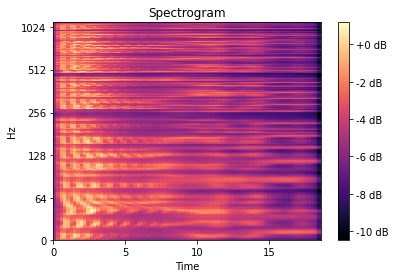

In [23]:
%matplotlib inline
librosa.display.specshow(mel_postnet_np, sr=2200, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram')
plt.show()

In [15]:
wav = tts_king.mel_to_wav(mel_postnet)
ipd.Audio(wav[0][0], rate=22050) 

In [77]:
wav_p = tts_king.mel_to_wav(mel_postnet)
ipd.Audio(wav_p[0][0], rate=22050) 

In [12]:
from scipy.io.wavfile import write

write("./examples/nik_prayer_masked.wav", 22050, wav[0][0].astype(np.int16))